###### 1. Introduction and Schema Diagram
In this project, we're going to practice using our SQL skills to answer business questions. For this, we'll use Chinook database, a media related data created using real data from an iTunes Library. You can find more about the database [here](https://github.com/lerocha/chinook-database).The Chinook database is provided as a SQLite database file called chinook.db.


Note: Currently working!!!


Below you can see the schema of the database(source: www.dataquest.io):

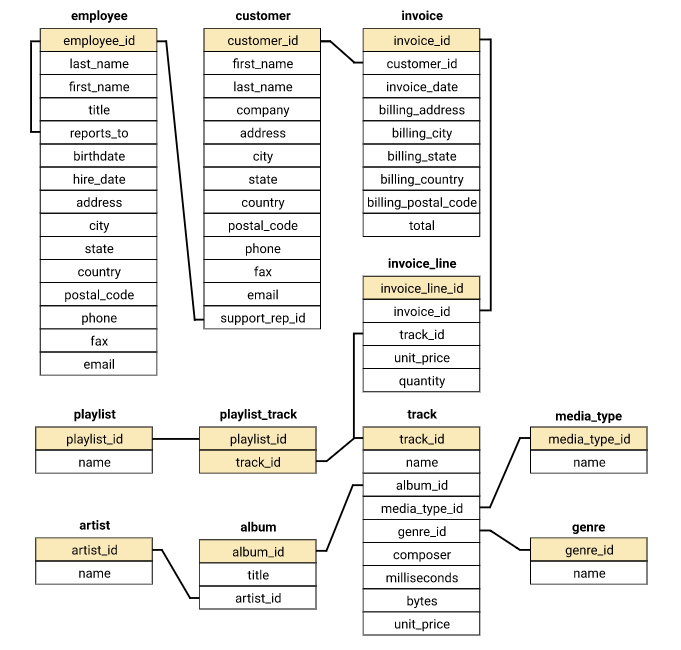

In [66]:
from IPython.display import Image
Image('../../data/img/ChinookDB.PNG')

Let's connect our Jupyter Notebook to our database file:

In [16]:
%%capture
%load_ext sql
%sql sqlite:///../../data/sqlDB/chinook.db

Following query will show list of tables and view in our database.

In [3]:
%%sql
SELECT * FROM sqlite_master WHERE type='table'

 * sqlite:///../../data/sqlDB/chinook.db
Done.


type,name,tbl_name,rootpage,sql
table,album,album,2,"CREATE TABLE [album]( [album_id] INTEGER PRIMARY KEY NOT NULL, [title] NVARCHAR(160) NOT NULL, [artist_id] INTEGER NOT NULL, FOREIGN KEY ([artist_id]) REFERENCES [artist] ([artist_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,artist,artist,3,"CREATE TABLE [artist]( [artist_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,customer,customer,4,"CREATE TABLE [customer]( [customer_id] INTEGER PRIMARY KEY NOT NULL, [first_name] NVARCHAR(40) NOT NULL, [last_name] NVARCHAR(20) NOT NULL, [company] NVARCHAR(80), [address] NVARCHAR(70), [city] NVARCHAR(40), [state] NVARCHAR(40), [country] NVARCHAR(40), [postal_code] NVARCHAR(10), [phone] NVARCHAR(24), [fax] NVARCHAR(24), [email] NVARCHAR(60) NOT NULL, [support_rep_id] INTEGER, FOREIGN KEY ([support_rep_id]) REFERENCES [employee] ([employee_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,employee,employee,5,"CREATE TABLE [employee]( [employee_id] INTEGER PRIMARY KEY NOT NULL, [last_name] NVARCHAR(20) NOT NULL, [first_name] NVARCHAR(20) NOT NULL, [title] NVARCHAR(30), [reports_to] INTEGER, [birthdate] DATETIME, [hire_date] DATETIME, [address] NVARCHAR(70), [city] NVARCHAR(40), [state] NVARCHAR(40), [country] NVARCHAR(40), [postal_code] NVARCHAR(10), [phone] NVARCHAR(24), [fax] NVARCHAR(24), [email] NVARCHAR(60), FOREIGN KEY ([reports_to]) REFERENCES [employee] ([employee_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,genre,genre,6,"CREATE TABLE [genre]( [genre_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,invoice,invoice,7,"CREATE TABLE [invoice]( [invoice_id] INTEGER PRIMARY KEY NOT NULL, [customer_id] INTEGER NOT NULL, [invoice_date] DATETIME NOT NULL, [billing_address] NVARCHAR(70), [billing_city] NVARCHAR(40), [billing_state] NVARCHAR(40), [billing_country] NVARCHAR(40), [billing_postal_code] NVARCHAR(10), [total] NUMERIC(10,2) NOT NULL, FOREIGN KEY ([customer_id]) REFERENCES [customer] ([customer_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,invoice_line,invoice_line,8,"CREATE TABLE [invoice_line]( [invoice_line_id] INTEGER PRIMARY KEY NOT NULL, [invoice_id] INTEGER NOT NULL, [track_id] INTEGER NOT NULL, [unit_price] NUMERIC(10,2) NOT NULL, [quantity] INTEGER NOT NULL, FOREIGN KEY ([invoice_id]) REFERENCES [invoice] ([invoice_id]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([track_id]) REFERENCES [track] ([track_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,media_type,media_type,9,"CREATE TABLE [media_type]( [media_type_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,playlist,playlist,10,"CREATE TABLE [playlist]( [playlist_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,playlist_track,playlist_track,11,"CREATE TABLE [playlist_track]( [playlist_id] INTEGER NOT NULL, [track_id] INTEGER NOT NULL, CONSTRAINT [pk_playlist_track] PRIMARY KEY ([playlist_id], [track_id]), FOREIGN KEY ([playlist_id]) REFERENCES [playlist] ([playlist_id]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([track_id]) REFERENCES [track] ([track_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"


We can see there are 11 tables with their name and syntax used to create it with datatypes of each columns.

Let's check first 5 rows from employee table.

In [4]:
%%sql
SELECT * FROM employee GROUP BY employee_id LIMIT 5

 * sqlite:///../../data/sqlDB/chinook.db
Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


We can see employee information like first_name, last_name, birth_date, hire_date, address and so on from the employee table.

###### 2. Overview of the Data
Let's get familiar with data by quering the info about table and views in our database.

In [5]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");

 * sqlite:///../../data/sqlDB/chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


As you can see, there are 3 more view created for quick access to certain portion of the data which is frequenlty used.

Note: Number of view many change based on any views are created or dropped. You can use `DROP VIEW database_name.view_name` to drop the view.

###### 3. Selecting Albums to Purchase

Let's us consider a hypothetical scenario of company to promote one artist from below genre:
- Hip-Hop
- Punk
- Pop
- Blues

Here, our task is to find the best possible genre based on sales previous sales records. So, we're going to write the query to ask our question. But we're are going to do it one step at a time by break the queries into small queries. 

First, let's group the customer based on their billing country.

In [10]:
%%sql
SELECT c.country,i.billing_country 
FROM invoice i
LEFT JOIN customer c
ON i.customer_id = c.customer_id
GROUP BY i.billing_country

 * sqlite:///../../data/sqlDB/chinook.db
Done.


country,billing_country
Argentina,Argentina
Australia,Australia
Austria,Austria
Belgium,Belgium
Brazil,Brazil
Canada,Canada
Chile,Chile
Czech Republic,Czech Republic
Denmark,Denmark
Finland,Finland


Second, we're going to find the total purchases.

In [16]:
%%sql
WITH 
    usa AS
    (
        SELECT 
            invoice_id,
            billing_country country
        FROM invoice
        WHERE billing_country = 'USA'
    ),
    track_usa AS
    (
        SELECT 
            il.track_id,
            il.quantity,
            u.country
        FROM usa u
        INNER JOIN invoice_line il
        ON u.invoice_id = il.invoice_id
    )
    
    
SELECT COUNT(*) total_purchased 
FROM track_usa 

 * sqlite:///../../data/sqlDB/chinook.db
Done.


total_purchased
1051


Third, we're going to show total record sold for each of the genre.

In [32]:
%%sql
WITH 
    usa AS
    (
        SELECT 
            invoice_id,
            billing_country country
        FROM invoice
        WHERE billing_country = 'USA'
    ),
    track_usa AS
    (
        SELECT 
            il.track_id,
            il.quantity,
            u.country
        FROM usa u
        INNER JOIN invoice_line il
        ON u.invoice_id = il.invoice_id
    ),
    total_sold_by_genre AS
    (
        SELECT  
            g.name genre, 
            COUNT(*) total_tracks_sold
        FROM track_usa tu
        INNER JOIN track t ON t.track_id = tu.track_id
        INNER JOIN genre g ON g.genre_id = t.genre_id
        GROUP BY g.name
        ORDER BY 2 DESC
    )
    
    

SELECT *
FROM total_sold_by_genre

 * sqlite:///../../data/sqlDB/chinook.db
Done.


genre,total_tracks_sold
Rock,561
Alternative & Punk,130
Metal,124
R&B/Soul,53
Blues,36
Alternative,35
Pop,22
Latin,22
Hip Hop/Rap,20
Jazz,14


Finally, we're adding percentage sold for each genre in above query.

In [5]:
%%sql
WITH 
    usa AS
    (
        SELECT 
            invoice_id,
            billing_country country
        FROM invoice
        WHERE billing_country = 'USA'
    ),
    track_usa AS
    (
        SELECT 
            il.track_id,
            il.quantity,
            u.country
        FROM usa u
        INNER JOIN invoice_line il
        ON u.invoice_id = il.invoice_id
    ),
    total_sold_by_genre AS
    (
        SELECT  
            g.name genre, 
            COUNT(*) total_tracks_sold
        FROM track_usa tu
        INNER JOIN track t ON t.track_id = tu.track_id
        INNER JOIN genre g ON g.genre_id = t.genre_id
        GROUP BY g.name
        ORDER BY 2 DESC
    ),
    total_sold AS
    (
        SELECT 
            SUM(total_tracks_sold) total
        FROM total_sold_by_genre
    )
    
    

SELECT 
    tg.genre,tg.total_tracks_sold,
    ROUND(CAST(tg.total_tracks_sold AS float)/ ts.total * 100,2)  percentage
FROM total_sold_by_genre tg,total_sold ts
LIMIT 10

 * sqlite:///../../data/sqlDB/chinook.db
Done.


genre,total_tracks_sold,percentage
Rock,561,53.38
Alternative & Punk,130,12.37
Metal,124,11.8
R&B/Soul,53,5.04
Blues,36,3.43
Alternative,35,3.33
Pop,22,2.09
Latin,22,2.09
Hip Hop/Rap,20,1.9
Jazz,14,1.33


In [1]:
# import standard libraries
import sqlite3
from sqlite3 import Error
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#let's try visualizing the results
def query_result(q,db):
    """
    Function returns the result in the form of dataFrame given sql 
    query.
    
    Args:
        q: query to execute.
        db: database object for connection.
    Returns:
        returns result in the form of pandas dataFrame
    
    """
    try:
        with sqlite3.connect(db) as conn:
            return pd.read_sql(q,conn)
    except Error as e:
        print(e)

In [2]:
# db connection object
db = "../../data/sqlDB/chinook.db"

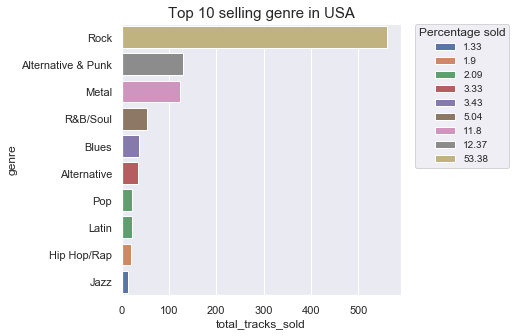

In [31]:
# calling the query_result function
q = ("WITH "
        "usa AS "  
        "( " 
            "SELECT " 
                "invoice_id, "
                "billing_country country "
            "FROM invoice "
            "WHERE billing_country = 'USA' "
        "), "
        "track_usa AS "
        "( "
            "SELECT " 
                "il.track_id, "
                "il.quantity, "
                "u.country "
            "FROM usa u "
            "INNER JOIN invoice_line il "
            "ON u.invoice_id = il.invoice_id "
        "), "
        "total_sold_by_genre AS "
        "( "
           " SELECT "  
                "g.name genre, " 
                "COUNT(*) total_tracks_sold "
            "FROM track_usa tu "
            "INNER JOIN track t ON t.track_id = tu.track_id "
            "INNER JOIN genre g ON g.genre_id = t.genre_id "
            "GROUP BY g.name "
            "ORDER BY 2 DESC "
        "), "
        "total_sold AS "
        "( "
            "SELECT " 
                "SUM(total_tracks_sold) total "
            "FROM total_sold_by_genre "
        ") "

     "SELECT tg.genre,tg.total_tracks_sold,"
    "ROUND(CAST(tg.total_tracks_sold AS float)/ ts.total * 100,2) " 
    "percentage "
    "FROM total_sold_by_genre tg,total_sold ts " 
    "LIMIT 10;")


result = query_result(q,db)
#plotting the results using seaborn
fig,ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x='total_tracks_sold',y='genre',
                  hue='percentage',data=result,dodge=False)

# Put the legend out of the figure
plt.legend(title='Percentage sold',bbox_to_anchor=(1.05, 1), 
           loc=2, borderaxespad=0.,
          fontsize=10)

plt.title('Top 10 selling genre in USA',fontsize=15)
plt.show()

Change the Query to make it more efficient.

Recommendation:
Based on the result that we have got, 
- Alternative & Punk genre shares the total sells of 12.37 percentage placing in second,
- Blues is in the 5th place with 3.43 percent sell,
- Followed by Pop in 7th place with 2.09 percent sell,
- Finally, Hip Hop/Rap genre resides in 9th place with 1.9 percent sell.

We can say that, all the artist genre fall on the top 10 tracks sell in Chinook data. But from above findings, we can suggest record label to invest money on advertising artist with genre Blues, Pop and Punk assuming Alternative & Punk means the Punk genre. `However, the sells doesn't totally answers the question about the customer buying behavoiur like loyal fans of the artist related to the genre or people look for new artist related to the genre they like. As only looking to the big picture doesn't actually suggest record label should invest their money on, so need to look more deep to the customer activities related to the specific genre.`

###### 4. Analyzing Employee Sales Performance
First purchased of every customer is handled by the sales support agent within the company. Let's find sales made by each of the sales support agent.

In [81]:
%%sql
WITH 
sales_by_employee AS
(
    SELECT 
        e.employee_id,
        e.first_name ||" "||e.last_name employee_name,
        e.hire_date,
        e.country,
        ROUND(SUM(i.total),2) total_sell
    FROM employee e
    INNER JOIN customer c ON c.support_rep_id = e.employee_id
    INNER JOIN invoice i ON i.customer_id = c.customer_id
    GROUP BY 1
    ORDER BY 5 DESC
)

SELECT * FROM sales_by_employee

 * sqlite:///../../data/sqlDB/chinook.db
Done.


employee_id,employee_name,hire_date,country,total_sell
3,Jane Peacock,2017-04-01 00:00:00,Canada,1731.51
4,Margaret Park,2017-05-03 00:00:00,Canada,1584.0
5,Steve Johnson,2017-10-17 00:00:00,Canada,1393.92


In [123]:
%%sql

WITH 
sales_by_employee AS
(
    SELECT 
        e.employee_id,
        e.first_name ||" "||e.last_name employee_name,
        e.hire_date,
        e.country,
        ROUND(SUM(i.total),2) total_sell
        
    FROM employee e
    INNER JOIN customer c ON c.support_rep_id = e.employee_id
    INNER JOIN invoice i ON i.customer_id = c.customer_id
    GROUP BY 1
    ORDER BY 5 DESC
),
employee_hire_date AS
(
    SELECT 
        employee_id,
        strftime('%Y',hire_date) year,
        strftime('%m',hire_date) month
    FROM sales_by_employee
),
sales_months_employee AS(
    SELECT 
        s.*,
        (strftime('%Y',CURRENT_TIMESTAMP) - ed.year)*12 - 
        (-1)*(strftime('%m',CURRENT_TIMESTAMP) - ed.month) months_employed
    FROM sales_by_employee s
    INNER JOIN employee_hire_date ed
    ON s.employee_id = ed.employee_id
    ORDER BY total_sell DESC
)

SELECT 
    s.*,
    ROUND(s.total_sell/s.months_employed,2) sells_per_month
FROM sales_months_employee s

 * sqlite:///../../data/sqlDB/chinook.db
Done.


employee_id,employee_name,hire_date,country,total_sell,months_employed,sells_per_month
3,Jane Peacock,2017-04-01 00:00:00,Canada,1731.51,36,48.1
4,Margaret Park,2017-05-03 00:00:00,Canada,1584.0,35,45.26
5,Steve Johnson,2017-10-17 00:00:00,Canada,1393.92,30,46.46


Let's use our query_result to get dataFrame from the query above to plot the bar graph.

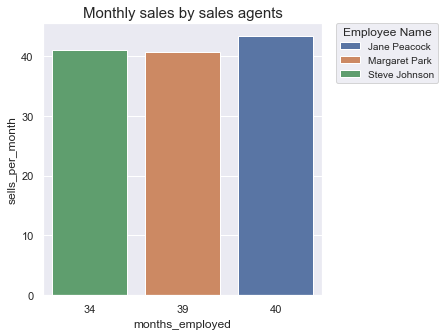

In [13]:
q = ("WITH "
     "sales_by_employee AS "
        "( "
            "SELECT " 
                "e.employee_id, "
                "e.first_name ||' '||e.last_name employee_name, "
                "e.hire_date, "
                "e.country, "
                "ROUND(SUM(i.total),2) total_sell "

            "FROM employee e "
            "INNER JOIN customer c ON c.support_rep_id = e.employee_id "
            "INNER JOIN invoice i ON i.customer_id = c.customer_id "
            "GROUP BY 1 "
            "ORDER BY 5 DESC "
        "), "
        "employee_hire_date AS "
        "( "
            "SELECT " 
                "employee_id, "
                "strftime('%Y',hire_date) year, "
                "strftime('%m',hire_date) month "
            "FROM sales_by_employee "
        "), "
        "sales_months_employee AS( "
            "SELECT " 
                "s.*, "
                "(strftime('%Y',CURRENT_TIMESTAMP) - ed.year)*12 - " 
                "(-1)*(strftime('%m',CURRENT_TIMESTAMP) - ed.month) months_employed "
            "FROM sales_by_employee s "
            "INNER JOIN employee_hire_date ed "
            "ON s.employee_id = ed.employee_id "
            "ORDER BY total_sell DESC "
        ") "

        "SELECT " 
            "s.*, "
            "ROUND(s.total_sell/s.months_employed,2) sells_per_month "
        "FROM sales_months_employee s;")

result1 =query_result(q,db)
#plotting the results using seaborn
fig,ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x='months_employed',y='sells_per_month',
                  hue='employee_name',data=result1,dodge=False)

# Put the legend out of the figure
plt.legend(title='Employee Name',bbox_to_anchor=(1.05, 1), 
           loc=2, borderaxespad=0.,
          fontsize=10)

plt.title('Monthly sales by sales agents',fontsize=15)
plt.show()

Based on the findings, sells by individual employee depends upon the date they were hired,basic idea is earlier the date they were hired more sells they accumulated. And looking further deep in for monthly sell for each employee, we get the overall view of each employee.

###### 5. Analyzing Sales by Country
Now, we're going analyze the sales data for `customers` from each different country.

In particular,we're going to calculate following:

- total number of customers
- total value of sales
- average value of sales per customer
- average order value

Since, there are a number of countries with only one customer,we're going to group those customers as "Other" category for our analysis.
As before, we're going to achieve this result in a step-wise manner.

In [17]:
%%sql
SELECT 
    c.country,        
    COUNT(DISTINCT c.customer_id) number_of_customer,
    COUNT(i.invoice_id) transaction_count,
    ROUND(i.total,2) total_sales
FROM customer c
INNER JOIN invoice i ON i.customer_id = c.customer_id 
GROUP BY c.country
ORDER BY 4 DESC

 * sqlite:///../../data/sqlDB/chinook.db
Done.


country,number_of_customer,transaction_count,total_sales
USA,13,131,15.84
Norway,1,9,11.88
Netherlands,1,10,11.88
Austria,1,9,11.88
Poland,1,10,10.89
Ireland,1,13,10.89
Germany,4,41,10.89
United Kingdom,3,28,9.9
India,2,21,9.9
Canada,8,76,9.9


First, we quried our result which is group by country and order by total sales in each country.

In [21]:
%%sql
WITH 
customer_by_country AS
    (
        SELECT 
            
            first_name ||" "|| last_name customer_name,
            count(customer_id) count,
            CASE
                WHEN count(customer_id)  == 1 THEN 'Other'
                ELSE country
                END
                AS derived_country
        FROM customer
        GROUP BY country
    ),
customer_by_derived_country AS
    (
        SELECT 
            derived_country country,
            SUM(count) number_of_customers
        FROM customer_by_country
        GROUP BY 1
    )
    

SELECT 
    country, 
    number_of_customers 
FROM (  
        SELECT 
            cd.*,
            CASE
                WHEN cd.country = 'Other' THEN 1
                ELSE 0
            END AS sort
        FROM customer_by_derived_country cd
        ORDER BY cd.number_of_customers DESC
    )
ORDER BY sort ASC;

 * sqlite:///../../data/sqlDB/chinook.db
Done.


country,number_of_customers
USA,13
Canada,8
Brazil,5
France,5
Germany,4
United Kingdom,3
Czech Republic,2
India,2
Portugal,2
Other,15


Second, we're putting the countries with only 1 customer to `Other` category. Then, we're creating custom sort with all the countries sorted in descending order except putting `Other` category at bottom.

In [19]:
%%sql

WITH 
customer_info AS
    (
        SELECT 
            CASE
                WHEN COUNT(DISTINCT c.customer_id)  == 1 THEN 'Other'
                ELSE c.country
                END
                AS derived_country,       
            COUNT(DISTINCT c.customer_id) number_of_customers,
            COUNT(i.invoice_id) transaction_count,
            ROUND(i.total,2) total_sales
        FROM customer c
        INNER JOIN invoice i ON i.customer_id = c.customer_id 
        GROUP BY c.country
        ORDER BY 4 DESC
    
    ),
    
customer_by_derived_country AS
    (
        SELECT 
            derived_country country,
            SUM(number_of_customers) number_of_customers,
            SUM(transaction_count) total_transaction,
            total_sales
        FROM customer_info
        GROUP BY 1
    )
    

SELECT 
    country,
    number_of_customers total_number_of_customers,
    total_transaction,
    total_sales,
    ROUND((total_sales / number_of_customers),2) avg_sales_per_customer,
    ROUND((total_sales/ total_transaction),2) avg_order_value
FROM (  
        SELECT 
            cd.*,
            CASE
                WHEN cd.country = 'Other' THEN 1
                ELSE 0
            END AS sort
        FROM customer_by_derived_country cd
        ORDER BY cd.number_of_customers DESC
    )
ORDER BY sort ASC;

 * sqlite:///../../data/sqlDB/chinook.db
Done.


country,total_number_of_customers,total_transaction,total_sales,avg_sales_per_customer,avg_order_value
USA,13,131,15.84,1.22,0.12
Canada,8,76,9.9,1.24,0.13
Brazil,5,61,8.91,1.78,0.15
France,5,50,1.98,0.4,0.04
Germany,4,41,10.89,2.72,0.27
United Kingdom,3,28,9.9,3.3,0.35
Czech Republic,2,30,8.91,4.46,0.3
India,2,21,9.9,4.95,0.47
Portugal,2,29,0.99,0.5,0.03
Other,15,147,11.88,0.79,0.08


Finally, combining above two queries to get the final result. Here we can see USA is on the top considering total transaction and total number of customer's. But if we consider average order value then India comes in the first place.